In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import random
import pandas as pd
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

from sklearn.metrics import  precision_score, recall_score, accuracy_score,classification_report 

2024-02-15 08:20:33.537640: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [5]:
path_ground_truth_data = '../hyper_kvasir_dataset/labeled-images/image-labels.csv'

In [6]:
ground_truth_labels = pd.read_csv(path_ground_truth_data)
print(ground_truth_labels.head())

                             Video file     Organ Finding  \
0  000e3fee-7f5c-4819-9f9c-4c983b68888a  Lower GI   cecum   
1  001a41c2-2a5d-40b1-8fd5-b5f2f292277b  Lower GI   cecum   
2  006af0aa-2044-4477-964d-10d9e043fb78  Lower GI   cecum   
3  00832522-ab8e-4b98-bfce-93a777929571  Lower GI   cecum   
4  012ab888-64e6-4361-9745-f52b4a03ba75  Lower GI   cecum   

         Classification  
0  anatomical-landmarks  
1  anatomical-landmarks  
2  anatomical-landmarks  
3  anatomical-landmarks  
4  anatomical-landmarks  


In [9]:
ground_truth_labels['Finding'].value_counts()

bbps-2-3                        1148
polyps                          1028
cecum                           1009
dyed-lifted-polyps              1002
pylorus                          999
dyed-resection-margins           989
z-line                           932
retroflex-stomach                764
bbps-0-1                         646
ulcerative-colitis-grade-2       443
esophagitis-a                    403
retroflex-rectum                 391
esophagitis-b-d                  260
ulcerative-colitis-grade-1       201
ulcerative-colitis-grade-3       133
impacted-stool                   131
barretts-short-segment            53
barretts                          41
ulcerative-colitis-grade-0-1      35
ulcerative-colitis-grade-2-3      28
ulcerative-colitis-grade-1-2      11
ileum                              9
hemorrhoids                        6
Name: Finding, dtype: int64

In [45]:
lesion_type_dict = {
    'NV': 'Melanocytic nevi',
    'MEL': 'Melanoma',
    'BKL': 'Benign keratosis ',
    'BCC': 'Basal cell carcinoma',
    'AKIEC': 'Actinic keratoses',
    'VASC': 'Vascular lesions',
    'DF': 'Dermatofibroma',
  
}



In [46]:
seed = 1
random.seed(seed)

path_ground_truth_data = 'ISIC2018_Task3_Test_GroundTruth/ISIC2018_Task3_Test_GroundTruth.csv'

# tabular_data = pd.read_csv('/kaggle/input/isic-2019/ISIC_2019_Training_Metadata.csv')

In [47]:
ground_truth_labels = pd.read_csv(path_ground_truth_data)
print(ground_truth_labels.head())

          image  MEL   NV  BCC  AKIEC  BKL   DF  VASC
0  ISIC_0034524  0.0  1.0  0.0    0.0  0.0  0.0   0.0
1  ISIC_0034525  0.0  1.0  0.0    0.0  0.0  0.0   0.0
2  ISIC_0034526  0.0  0.0  0.0    0.0  1.0  0.0   0.0
3  ISIC_0034527  0.0  1.0  0.0    0.0  0.0  0.0   0.0
4  ISIC_0034528  0.0  1.0  0.0    0.0  0.0  0.0   0.0


In [48]:
ground_truth_labels[ground_truth_labels['image'] == 'ISIC_0034321']



,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC


In [10]:
isic_path='../ISIC_2018/ISIC2018_Task3_Validation_Input'
def get_isic_df():
    df = pd.read_csv('ISIC2018_Task3_Validation_GroundTruth/ISIC2018_Task3_Validation_GroundTruth.csv')

    
    for label in df.columns[1:]:
        df.loc[df[label] == 1.0, 'label'] = label
        
    df.rename(columns={'image': 'path'}, inplace=True)
    df['path'] = df['path'].apply(lambda x: "{}/{}.jpg".format(isic_path,x))
    df = df[['path', 'label']]
    return df

In [11]:
df=get_isic_df()

In [12]:
df.head()

,path,label
0,../ISIC_2018/ISIC2018_Task3_Validation_Input/I...,NV
1,../ISIC_2018/ISIC2018_Task3_Validation_Input/I...,NV
2,../ISIC_2018/ISIC2018_Task3_Validation_Input/I...,BCC
3,../ISIC_2018/ISIC2018_Task3_Validation_Input/I...,NV
4,../ISIC_2018/ISIC2018_Task3_Validation_Input/I...,NV


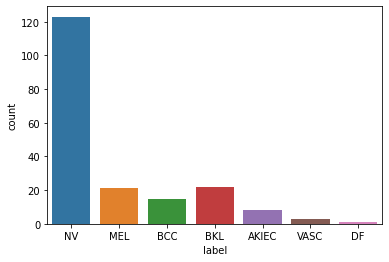

In [13]:
ax = sns.countplot(x="label", data=get_isic_df(), order=['NV', 'MEL', 'BCC', 'BKL', 'AKIEC', 'VASC', 'DF'])

In [14]:
label_counts = df['label'].value_counts()

# Display the counts
print(label_counts)

NV       123
BKL       22
MEL       21
BCC       15
AKIEC      8
VASC       3
DF         1
Name: label, dtype: int64


In [54]:
df.to_csv('test_labels.csv', index=False)